# Part 1 -  Pandas

Name: Esmeralda Garcia
Course Number: MSBD 566
Date: Fall 2025
Honor Statement: I did not receive or give any assistance to anyone for this assignment.

## Problem Description:

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as 
f|ollows:
Pol |len Count Pol |l| en Level
0 | .0           |t| o 2.4 Low
 | 2.5 to 4.8 L |
| w – Medium | 
4.9 t       |o|  7.2 Medium | 
7.3 to 9.6 |
| 9.7 to 12.0 | High         |

**Sources:**  
1. https://data.nashville.gov/datasets/Nashville::air-quality-and-pollen-count/about  
2. https://www.nashville.gov/departments/health/environmental-health/air-pollutioncontrol/daily-aqi-and-pollen-countMedium – High

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Air_Quality_and_Pollen_Count.csv")
print("Shape:", df.shape)
print(df.info())
print(df.head())
print (df.describe(include="all"))

Shape: (8920, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              8920 non-null   int64  
 1   AQI                   8692 non-null   float64
 2   Category              8920 non-null   object 
 3   ResponsiblePollutant  8690 non-null   object 
 4   PollenCount           5075 non-null   float64
 5   PollenType            4687 non-null   object 
 6   PollenDescription     8800 non-null   object 
 7   ReportDateTime        8920 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 557.6+ KB
None
   OBJECTID   AQI  Category ResponsiblePollutant  PollenCount PollenType  \
0         1  47.0      Good                PM2.5          9.0    Juniper   
1         2  49.0      Good                PM2.5          1.0        Elm   
2         3  51.0  Moderate                PM2.5         11.0        E

In [6]:
print(df.describe(include="all").T.head(20))

                       count unique                     top  freq       mean  \
OBJECTID              8920.0    NaN                     NaN   NaN     4460.5   
AQI                   8692.0    NaN                     NaN   NaN  45.268293   
Category                8920      6                    Good  5991        NaN   
ResponsiblePollutant    8690      6                   PM2.5  6240        NaN   
PollenCount           5075.0    NaN                     NaN   NaN  16.173596   
PollenType              4687     16                   Grass  2330        NaN   
PollenDescription       8800     21             Not on file  3721        NaN   
ReportDateTime          8920   8675  2002/06/15 05:00:00+00     5        NaN   

                              std  min      25%     50%      75%     max  
OBJECTID              2575.126534  1.0  2230.75  4460.5  6690.25  8920.0  
AQI                     16.603862  0.0     34.0    44.0     52.0   151.0  
Category                      NaN  NaN      NaN     Na

Missing values (%):
 PollenType              0.474552
PollenCount             0.431054
ResponsiblePollutant    0.025785
AQI                     0.025561
PollenDescription       0.013453
OBJECTID                0.000000
Category                0.000000
ReportDateTime          0.000000
dtype: float64


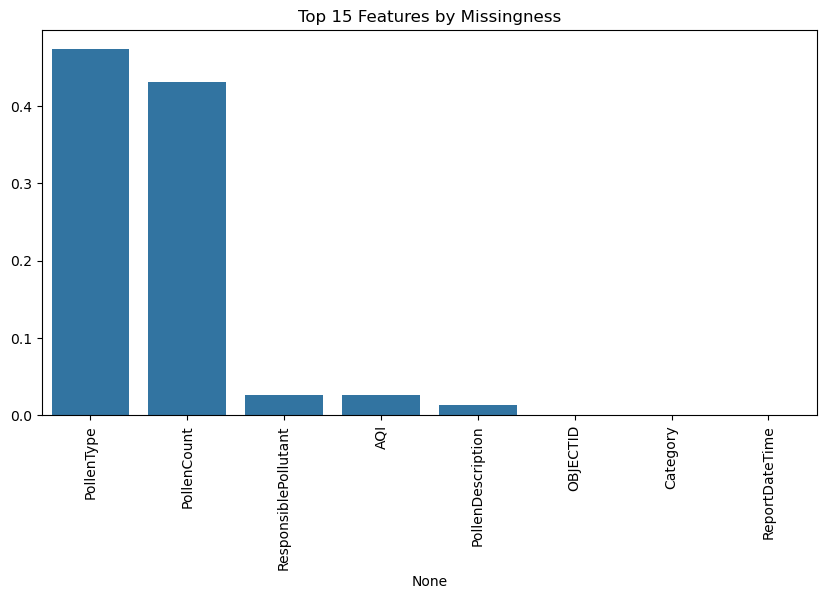

In [7]:
#Find all the missing data in the AQI dataset
missing = df.isna().mean().sort_values(ascending=False)
print("Missing values (%):\n", missing.head(15))

plt.figure(figsize=(10,5))
sns.barplot(x=missing.index[:15], y=missing.values[:15])
plt.xticks(rotation=90)
plt.title("Top 15 Features by Missingness")
plt.show()

## Question 1

**Explore the data by plotting AQI and Category across the years in two separate plots.**

**a. How many times has the AQI been recorded above 120?**  
**b. When did the Air Quality Index Category become unhealthy?** 

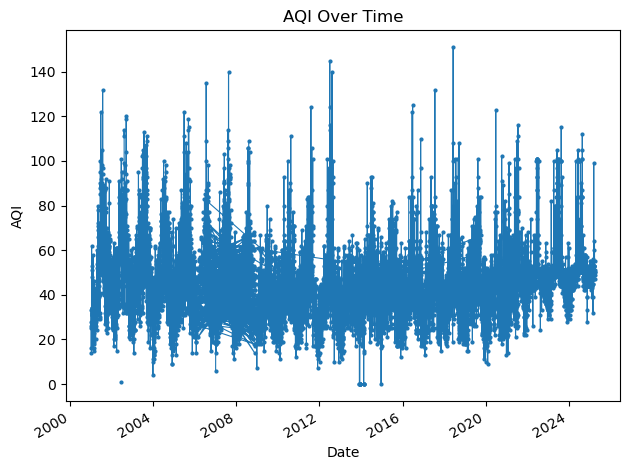

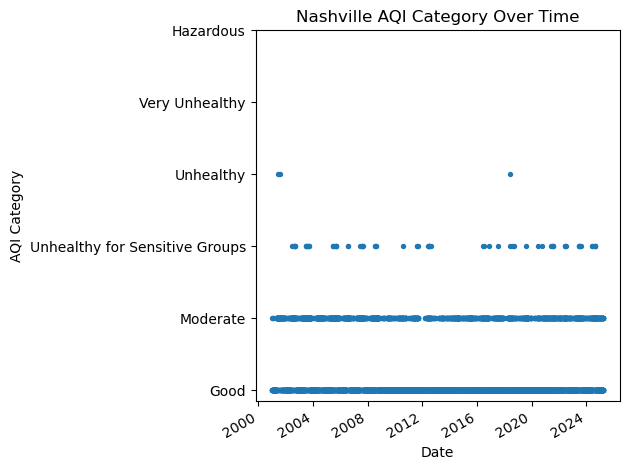

a) Number of days with AQI > 120: 14
b) First 'Unhealthy' date: 2001-06-21


In [23]:
df['ReportDateTime'] = pd.to_datetime(df['ReportDateTime'], format='mixed')
plt.figure()
plt.plot(df['ReportDateTime'], df['AQI'], marker='o', linestyle='-', linewidth=0.8, markersize=2)
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Over Time")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(df["ReportDateTime"], df["CategoryNum"], s=8)
plt.yticks(list(range(1, len(cat_order)+1)), cat_order)
plt.xlabel("Date")
plt.ylabel("AQI Category")
plt.title("Nashville AQI Category Over Time")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# a) How many times AQI > 120
count_over_120 = int((df["AQI"] > 120).sum())

# b) First date when Category became Unhealthy
unhealthy_set = {"Unhealthy", "Very Unhealthy", "Hazardous"}
mask_unhealthy = df["Category"].isin(unhealthy_set)
first_unhealthy_date = df.loc[mask_unhealthy, "ReportDateTime"].min()

print(f"a) Number of days with AQI > 120: {count_over_120}")
if pd.notna(first_unhealthy_date):
    print(f"b) First 'Unhealthy' date: {first_unhealthy_date:%Y-%m-%d}")

## Question 2

**Which pollen type occurs the most? Hint: You can use scatterplot if needed.**

In [26]:
pollen_counts = df["PollenType"].value_counts(dropna=True)
top_type = pollen_counts.idxmax()
top_count = int(pollen_counts.max())
print("Pollen type counts (excluding NaN):")
display(pollen_counts)
print(f"\nMost frequent pollen type: {top_type} (n={top_count})")

nan_count = df["PollenType"].isna().sum()

print(f"Number of NaN values: {nan_count}")

Pollen type counts (excluding NaN):


PollenType
Grass        2330
Ragweed       603
Cedar         405
Elm           398
Alder         291
Juniper       235
Birch         181
Maple         132
Hickory        88
Oak            15
Pine            3
Mulberry        2
Goldenrod       1
Poplar          1
Ash             1
Hackberry       1
Name: count, dtype: int64


Most frequent pollen type: Grass (n=2330)
Number of NaN values: 4233


## Question 3 (Open-ended)

**Based on this data, do you think Nashville is a city that is comfortable to live (based on the air quality and pollen only)? Why?**

In [30]:
if "Category" in df.columns:
    cat_share = (df["Category"].value_counts(normalize=True).sort_index()) * 100
    summary["category_share_%"] = cat_share.round(2)

summary

{'category_share_%': Category
 Good                              67.16
 Moderate                          29.37
 Not on file                        2.56
 SLIGHT                             0.01
 Unhealthy                          0.04
 Unhealthy for Sensitive Groups     0.85
 Name: proportion, dtype: float64}

Based on the data above, I would consider Nashville a comfortable place to live. The majority of the days if we include "Good" and "Moderate" add up to almost the entire time. Grass pollen being the major pollen type means we can take action to mitigate the pollen around my place of residence, and that's assumeing I would be allergic to it.

## Question 4 A Vectorization Problem

**Compare the manual approach versus a vectorized 
approach to find the mean AQI for each Air Quality Category ('Category' in the table) 
For the vectorized method, you can use groupby() and mean() method in pandas dataty e
(ex: data.groupby('ColumnName') and dataList.mean()).  or the manual method  a
regular for-loop can be used. Calculate the time difference between the two approaches and
eval**uate.

In [36]:
import time

# Vectorized approach (groupby + mean)
t0 = time.time()
vec_result = df.groupby("Category", observed=True)["AQI"].mean()
t1 = time.time()
vec_time = t1 - t0

print("Vectorized (groupby) mean AQI by Category:")
print(vec_result)
print(f"\nVectorized time: {vec_time:.6f} seconds")

# Manual loop approach
t2 = time.time()
sums = {}
counts = {}

for cat, aqi in zip(df["Category"], df["AQI"]):
    if pd.isna(cat) or pd.isna(aqi):
        continue
    if cat not in sums:
        sums[cat] = 0.0
        counts[cat] = 0
    sums[cat] += aqi
    counts[cat] += 1

manual_means = {cat: (sums[cat] / counts[cat]) for cat in sums if counts[cat] > 0}
t3 = time.time()
manual_time = t3 - t2

print("\nManual (loop) mean AQI by Category:")
print(pd.Series(manual_means))

print(f"\nManual time:     {manual_time:.6f} seconds")

diff = (vec_result - pd.Series(manual_means)).abs().dropna()
print("\nAbsolute differences between methods (should be ~0):")
print(diff)

Vectorized (groupby) mean AQI by Category:
Category
Good                               36.966283
Moderate                           62.240840
Not on file                              NaN
SLIGHT                             60.000000
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    110.078947
Name: AQI, dtype: float64

Vectorized time: 0.000997 seconds

Manual (loop) mean AQI by Category:
Good                               36.966283
Moderate                           62.240840
Unhealthy for Sensitive Groups    110.078947
Unhealthy                         127.500000
SLIGHT                             60.000000
dtype: float64

Manual time:     0.009972 seconds

Absolute differences between methods (should be ~0):
Good                              0.0
Moderate                          0.0
SLIGHT                            0.0
Unhealthy                         0.0
Unhealthy for Sensitive Groups    0.0
dtype: float64
